In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import re


def translate(to_translate):
    tabin = u'áéíóúüâêîôûöëäï'
    tabout = u'aeiouuaeiouoeai'
    tabin = [ord(char) for char in tabin]
    translate_table = dict(zip(tabin, tabout))
    return to_translate.translate(translate_table)

def Tokenizar(line):
    list_Tokens = []
    tokens = line.split(" ")
    for token in tokens:
        token = token.strip()
        token = token.lower()
        token = translate(token)
        token = re.sub('[◄►•«»;:-\[\]!\"\$%&\(\)=,·\\ \'\`´|\{\}\-\@/°\+\*\“¿›>¡!\\\/_]', '', token)
        token = re.sub('[\.\?]', '', token)
        if len(token) > 0:
            list_Tokens.append(token)
    return list_Tokens


In [2]:
filepath = "../Colecciones/Quijote.txt"
terms = {}

with open(filepath, encoding='UTF-8') as f:
    list_tokens = Tokenizar(f.read().replace('\n', ' '))
    for token in list_tokens:
        if token in terms:
            terms[token] += 1
        else:
            terms[token] = 1
terms_ord = sorted(terms.values(), reverse=True)
x = range(1,len(terms_ord)+1)

In [3]:
ajuste = np.polyfit(x, terms_ord, 3)
 
rectaAjusteEc = np.poly1d(ajuste)
y_pred = rectaAjusteEc(x)


fig= plt.figure(figsize=(20,10))
plt.xscale('linear')
plt.scatter(x,terms_ord, label='Datos originales')
plt.plot(x, y_pred, color="red", label='Ajuste')
 
plt.legend(loc='best')
plt.show()

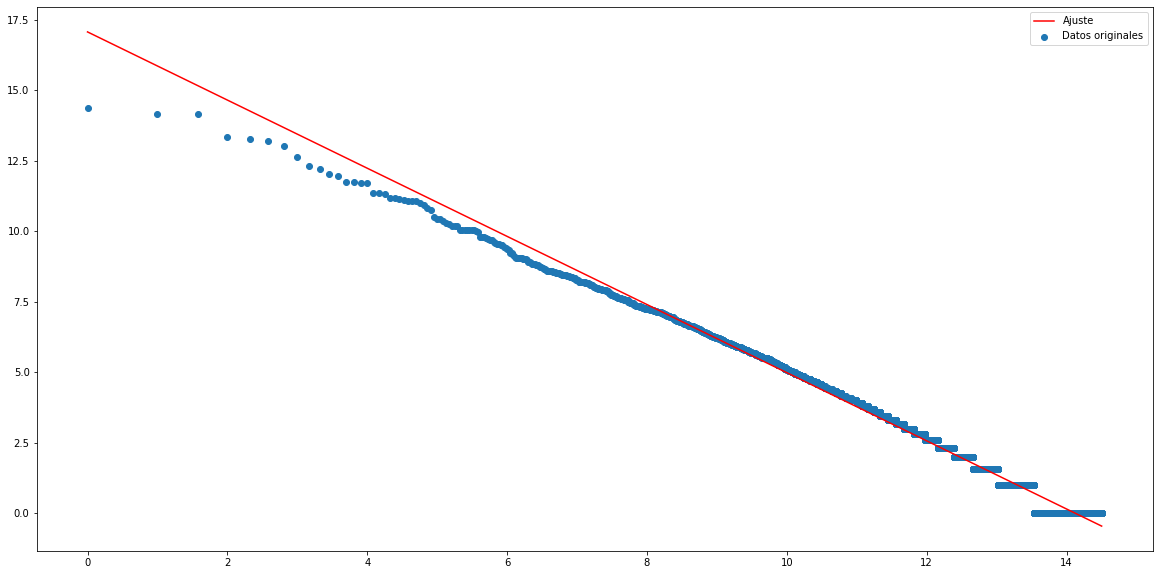

In [4]:
xlog = np.log2(x)
ylog = np.log2(terms_ord)

ajuste = np.polyfit(xlog, ylog, 1)
 
rectaAjusteEc = np.poly1d(ajuste)
y_pred = rectaAjusteEc(xlog)

fig= plt.figure(figsize=(20,10))
plt.xscale('linear')
plt.scatter(xlog,ylog, label='Datos originales')
plt.plot(xlog, y_pred, color="red", label='Ajuste')
 
plt.legend(loc='best')
plt.show()
